# Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import pylab
import datetime 

#Seasonality
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

#Math
from math import e
from math import pi

from scipy.stats import spearmanr

#Linear Regression
from sklearn import datasets, linear_model

#Solvers
from sympy import symbols, Eq, solve, Symbol

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [3]:
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"


In [4]:
df = pd.read_csv(path)
df = df.drop('Unnamed: 0',axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


White Noise: When should I stop feeding my data
Is there a pattern in residuals that I need to capture
White Noise is a timeseries if its mean is equal to zero, standard deviation is constant with time, and correlation between lags is zero.  
White noise is not predictable cannot be better.
We assume a time series $y_{t}= signal + noise
Testing white noise: visual tests, global vs. local checks and acf test; if passed every one of them, the residuals can be reviewed as white noise

In [6]:
df.describe()

,Session ID,User ID,Elapsed Time,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
count,1.474942e+06,1.474942e+06,7.871520e+05,1.474942e+06,1.474942e+06,91932.000000,1.474942e+06,1474942.0
mean,3.610106e+06,6.014954e+05,2.675005e+04,7.265091e+01,2.147225e+00,416.188639,1.286455e+01,-2.0
std,4.257792e+05,2.127366e+05,2.402765e+06,3.089250e+01,1.389685e+00,33.636576,3.602242e+00,0.0
min,2.872635e+06,2.005000e+03,-8.000000e+00,1.030000e+01,-1.000000e+00,400.000000,0.000000e+00,-2.0
25%,3.241370e+06,5.602040e+05,3.000000e+00,4.964000e+01,1.000000e+00,403.000000,1.000000e+01,-2.0
50%,3.610106e+06,7.114450e+05,2.570000e+02,6.823000e+01,2.000000e+00,403.000000,1.300000e+01,-2.0
75%,3.978841e+06,7.431600e+05,1.470000e+03,8.933000e+01,3.000000e+00,403.000000,1.600000e+01,-2.0
max,4.347576e+06,7.510000e+05,1.126910e+09,4.035300e+02,4.000000e+00,500.000000,2.300000e+01,-2.0


# Resample Hourly

In [7]:
df_h = df.set_index('Timestamp').resample('60min').mean()
df_h = df_h.reset_index()

In [ ]:
df_h = df_h[df_h['Memoria Usata'].notna()] #drop rows with nan values in memory usage column

In [ ]:
df_h

# Auto Correlation Function (ACF)
Autocorrelation takes value between 1 and -1. 0 means there is no correlation, 1 means there is a strong positive correlation and -1 means there is a strong negative correlation.

In [ ]:
acf_plot = plot_acf(df_h["Memoria Usata"])
pyplot.show()

In [ ]:
acf_plot = plot_acf(df_h["Memoria Usata"], lags= 24)
pyplot.show()

In [ ]:
acf_plot = plot_acf(df_h["Memoria Usata"], lags= 36)
pyplot.show()

In [ ]:
acf_plot = plot_acf(df_h["Memoria Usata"], lags= 48)
pyplot.show()

# Auto Correlation Function resampled by 2 hours

In [ ]:
df_h = df.set_index('Timestamp').resample('120min').mean()
df_h = df_h.reset_index()

In [ ]:
df_h = df_h[df_h['Memoria Usata'].notna()] #drop rows with nan values in memory usage column

In [ ]:
df_h = df.set_index('Timestamp').resample('60min').mean()
df_h = df_h.reset_index()

In [ ]:
df_h = df_h[df_h['Memoria Usata'].notna()] #drop rows with nan values in memory usage column

# Fourier Transform

In [ ]:
import scipy.fft
fft = scipy.fft(df["Memoria Usata"])
freq = np.fft.fftfreq(len(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


In [ ]:
df_fft = pd.DataFrame({"freq": freq, "fft":fft})

In [ ]:
df_fft = df_fft.set_index("freq")

In [ ]:
df_fft

,fft
freq,
0.000000e+00,1.071559e+08+0.000000e+00j
6.779928e-07,4.400716e+06-4.380222e+06j
1.355986e-06,7.520154e+05-3.714458e+06j
2.033978e-06,-1.944295e+06-3.266014e+06j
2.711971e-06,-1.344124e+06-2.025287e+06j
...,...
-3.389964e-06,-1.212836e+06+1.381159e+06j
-2.711971e-06,-1.344124e+06+2.025287e+06j
-2.033978e-06,-1.944295e+06+3.266014e+06j


In [ ]:
df_fft.sort_index()

,fft
freq,
-0.500000,19332.00000081-0.00000000j
-0.499999,-18925.316315+3295.996765j
-0.499999,13058.580319-7776.830340j
-0.499998,-10219.324716-23855.728291j
-0.499997,7858.7527120+6160.7086160j
...,...
0.499997,-404.101213-03062.6347300j
0.499997,7858.7527120-6160.7086160j
0.499998,-10219.324716+23855.728291j


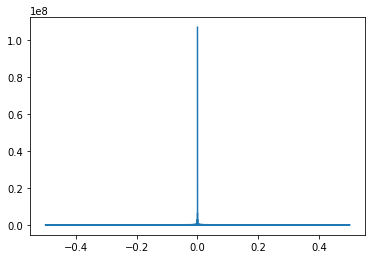

In [ ]:
pylab.figure()
pylab.plot( df_fft.index, np.abs(df_fft.fft) )
pylab.show()

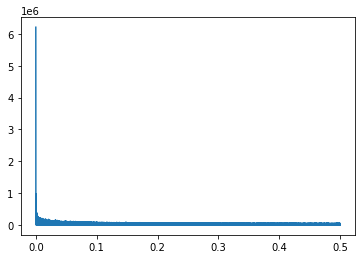

In [ ]:
pylab.figure()
pylab.plot( df_fft[df_fft.index >0].index, np.abs(df_fft[df_fft.index >0].fft) )
pylab.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_fft[df_fft.index >0].index , y=np.abs(df_fft[df_fft.index >0].fft)))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

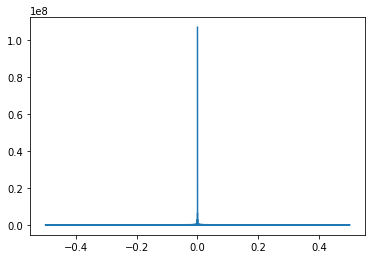

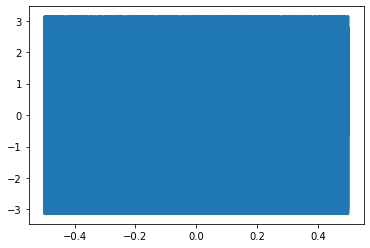

In [ ]:
import pylab
pylab.figure()
pylab.plot( freq, np.abs(fft) )
pylab.figure()
pylab.plot(freq, np.angle(fft) )
pylab.show()

In [ ]:
max(fft)

(107155873.68999998+0j)

In [ ]:
np.abs((4400716.439382484+4380221.506757414j))

6209077.679342677

In [ ]:
list(fft).index((4400716.439382484+4380221.506757414j))

1474941

In [ ]:
fft[1474941:]

array([4400716.43938248+4380221.50675741j])

In [ ]:
max(np.abs(fft))

107155873.68999998

In [ ]:
import heapq
nlargest = heapq.nlargest(1000,np.abs(fft) )

In [ ]:
# fft_abs = np.abs(fft)
# indexes = []
# for i in range(len(fft_abs)):
#   if fft_abs[i] in nlargest:
#     indexes.append(i)

In [ ]:
# pylab.figure()
# pylab.plot( freq, np.abs(fft) )
# pylab.figure()
# pylab.plot(freq, np.angle(fft) )
# # pylab.show()

In [ ]:
# plt.plot(freq, fft.real**2 + fft.imag**2)
# plt.show()

In [ ]:
# plt.plot(fft_abs[:100])
# plt.show()

## Data Normalization

In [ ]:
# normalized = df["Memoria Usata"] - np.mean(df["Memoria Usata"])
# fft = scipy.fft(normalized)
# freq = np.fft.fftfreq(len(df))

In [ ]:
# fig = go.Figure()


# # fig.add_trace(go.Scatter(
# #     x=freq,
# #     y=np.abs(fft)

# # ))
# fig.add_trace(go.Scatter(x = freq,y=np.abs(fft)))

# fig.show()

In [ ]:
# fig = go.Figure()


# # fig.add_trace(go.Scatter(
# #     x=freq,
# #     y=np.abs(fft)

# # ))
# fig.add_trace(go.Scatter(x = freq))

# fig.show()

In [ ]:
# freq

In [ ]:
# len(freq)

In [ ]:
# len(np.abs(fft))

x_t = mu + w*t

In [ ]:
from math import e

In [ ]:
len(df)

1474942

In [ ]:
df_h.iloc[9].Timestamp.date()

datetime.date(2022, 2, 1)

In [ ]:
max(df_h.Timestamp).date()

datetime.date(2022, 2, 28)

In [ ]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


In [ ]:
df_h.set_index("Timestamp")

,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
Timestamp,,,,,,,,,,
2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0


# April 29, 2022

$S = W . s$

$W = N$ x $V$ matrix, $s$ is the vector of the memory usage values

$N$ is the number of the time indexes in our case. Data of a month, February (28 days), resampled by one hour, total is 672 data samples.


$W_{ab} =\mathrm{e}^{2 \pi j b n_a /N}$ where $k = 0, 1, ..., N-1$.


 $S = \sum_{ n \in V} S(n) \mathrm{e}^{2 \pi j k n /N} $.



In [ ]:
v_t =[]
summation = 0
data_points = []
for i in range(len(df_h)):
  if df_h.Timestamp.iloc[i].date() != max(df_h.Timestamp).date(): #Excluding the last day in the data, to avoid index out of range error

    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]]["Memoria Usata"].values #s(t) = Current value
    next_day_same_time = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]+datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t+24hours) = Value which is tracked in next day, at same time 

    if  ~np.isnan(next_day_same_time) and ~np.isnan(current): #if s(t) and s(t+T) are both present, add them to V_t
      data_points.append(current*(e**(1j*2*pi*i*(1/(24*28)))))


In [ ]:
plt.plot(data_points)
plt.xlabel("n∈V where V = {valid points}\n Valid points are points that both the current point and the point after 24 hours are valid.")
plt.ylabel("s(nTs).e^(jnTsKF2pi")
plt.show()

In [ ]:
sum(data_points)

In [ ]:
len(df_h)

# ARIMA from Scratch

# Hourly samples
Select the hour with most valid samples as creating equation.

In [ ]:
df_h.h = [df_h.iloc[i].Timestamp.hour for i in range(len(df_h))]

In [ ]:
df_h

In [ ]:
df_h["Timestamp"].iloc[9].hour

In [ ]:
grouped_hour = df_h.groupby(df_h.h)
hours=[grouped_hour.get_group(x) for x in grouped_hour.groups]

In [ ]:
full_values =[]
for i in range(len(hours)):
  print("At time: {}.00, total number of samples collected: {}".format(hours[i].iloc[0].h, len(hours[i])))
  if len(hours[i]) == 28: #for february in our case
    full_values.append(i)

In [ ]:
full_values

As observed, at time 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, tehre are no missing values. Therefore, as an example equation I will use values tracked at 11.

# Create AR and MA equation

In [ ]:
hours[11]

In [ ]:
fig = plt.figure()
plt.plot(hours[11]["Timestamp"], hours[11]["Memoria Usata"])
fig.autofmt_xdate()
plt.show()


In [ ]:
min_std =  full_values[0]
for i in full_values:
  fig = plt.figure()
  plt.title("Memory usage at {}".format(hours[i].iloc[0].h))
  plt.plot(hours[i]["Timestamp"], hours[i]["Memoria Usata"])
  fig.autofmt_xdate()
  plt.show()
  curr_std = np.std(hours[i]["Memoria Usata"])
  if curr_std < np.std(hours[min_std]["Memoria Usata"]):
    min_std = i
  print("Standard Deviation at {}: {} ".format( i,np.std(hours[i]["Memoria Usata"])))

In [ ]:
min_std

Minimum standard deviation is observed in the samples that are tracked on 16.00, I am taking these dataset to develop an example equation.

In [ ]:
difference_bw_samples = []
for i in range(len(hours[min_std])-1):
  difference_bw_samples.append(hours[min_std].iloc[i+1]["Memoria Usata"]- hours[min_std].iloc[i]["Memoria Usata"])

In [ ]:
difference_bw_samples, sum(difference_bw_samples)

Calculating the difference between samples with different samplings, 1 lag later time point - current, 2 lag later time point - current ... len(total_number of days)-1 lag later time point - current

In [ ]:
sum_difference_bw_samples = []
for i in range(1,27):
  difference_bw_samples = []
  for j in range(len(hours[min_std])-i):
    difference_bw_samples.append(hours[min_std].iloc[j+i]["Memoria Usata"]- hours[min_std].iloc[j]["Memoria Usata"])
  sum_difference_bw_samples.append(sum(difference_bw_samples))

In [ ]:
sum_difference_bw_samples

In [ ]:
tri = []
for i in range(len(df_h)):
  tri.append(df_h["Memoria Usata"])
tri = np.array(tri)
tri = np.delete(tri, len(df_h["Memoria Usata"])-1, 0)
tri = np.delete(tri, len(df_h["Memoria Usata"])-1, 1)


In [ ]:
tri, tri.shape

In [ ]:
tri = np.tril(tri,-1)

In [ ]:
for i in range(len(df_h)-1):
  tri[i][i] = df_h["Memoria Usata"].iloc[i]

In [ ]:
tri

In [ ]:
y_t = df_h["Memoria Usata"][1:]

In [ ]:
len(y_t)

In [ ]:
sol = np.linalg.solve(tri, y_t)


In [ ]:
len(sol)

In [ ]:
np.dot(tri, sol)

In [ ]:
y_t

In [ ]:
df_h

# Number of daily samples per date

In [ ]:
df_h["date"] = [df_h.iloc[i].Timestamp.date() for i in range(len(df_h))]

In [ ]:
grouped_date = df_h.groupby(df_h.date)
dates=[grouped_date.get_group(x) for x in grouped_date.groups]



In [ ]:
full_hours=[]
for i in range(len(dates)):
  if len(dates[i]) == 24:
    full_hours.append(dates[i].iloc[0].date)
full_hours

In [ ]:
fig = go.Figure()
for i in full_hours:
  # add line
  fig.add_trace(go.Scatter(
      x=[i for i in range(24)],
      y =df_h[df_h.date == i]["Memoria Usata"]
  ))


fig.show()

In [ ]:
daily_weights = []
for i in range(24):
  daily_weights.append(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)
daily_weights


In [ ]:
np.array(daily_weights).shape

In [ ]:
daily_weights = np.tril(daily_weights,-1)

In [ ]:
daily_weights

In [ ]:
for i in range(len(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)):
  daily_weights[i][i] = df_h[df_h.date == full_hours[-1]]["Memoria Usata"].iloc[i]

In [ ]:
daily_weights

In [ ]:
sol = np.linalg.solve(daily_weights,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values )


In [ ]:
sol

In [ ]:
np.dot(daily_weights, sol)

In [ ]:
def predict(daily_data, weights): #grouppedbydates[i]
  daily_weights = []
  missing_hours = []
  for i in 
  for i in range(len(daily_data)):
    daily_weights.append(daily_data["Memoria Usata"].values)
  daily_weights = np.tril(daily_weights,-1)
  for i in range(len(daily_data.values)):
    daily_weights[i][i] = daily_data.iloc[i]

  return daily_weights

In [ ]:
dates[0]

In [ ]:
daily_data = dates[0]
daily_weights = sol
daily_matrix = []
missing_hours = list(set([i for i in range(24)])-set(daily_data.h)) #find hours that no sample is tracked, these step is fopr detecting the deleting the values in the weights vector
if len(missing_hours) >0:
  daily_weights = np.delete(daily_weights, missing_hours)
  
#form lower triangular matrix
for i in range(len(daily_data)):
  daily_matrix.append(daily_data["Memoria Usata"].values)
daily_matrix = np.tril(daily_matrix,-1)
#add diagonal values
for i in range(len(daily_data.values)):
  daily_matrix[i][i] = daily_data["Memoria Usata"].iloc[i]

pred = np.dot(daily_matrix, daily_weights)[np.dot(daily_matrix, daily_weights)>0]

In [ ]:
pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dates[0]["Memoria Usata"], pred)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[i for i in range(24)],
    y =pred
))
fig.add_trace(go.Scatter(
    x=[i for i in range(24)],
    y =dates[0]["Memoria Usata"]
))

fig.show()

In [ ]:
type(missing_hours)

In [ ]:
list(set([i for i in range(24)])-set(dates[0].h))

In [ ]:
len(df_h[df_h.date == full_hours[-1]])


# Create Pure AR Model

In [ ]:
s = ""
for i in range(24):
  s += "{}*(x**{}) +".format(df_h[df_h.date == full_hours[-1]]["Memoria Usata"][::-1].iloc[i],i)

In [ ]:
s

In [ ]:
s += "y"

In [ ]:
s

In [ ]:
df_h[df_h.date == full_hours[-1]]["Memoria Usata"][::-1]

# Trying to solve whole equation with Python Solver

In [ ]:

a = Symbol('a')
err = Symbol('err')

solve(68.72222222222223*(a**0) +46.574*(a**1) +61.54714285714285*(a**2) +82.47576923076923*(a**3) +50.257777777777775*(a**4) +72.70813953488371*(a**5) +71.39755102040817*(a**6) +70.15286266924565*(a**7) +71.72448416751789*(a**8) +68.04427406199021*(a**9) +69.6434756554307*(a**10) +67.05717299578059*(a**11) +59.63848787446505*(a**12) +54.686544342507645*(a**13) +75.0915470852018*(a**14) +56.802434210526314*(a**15) +52.76800643086816*(a**16) +54.884882352941176*(a**17) +62.86163212435233*(a**18) +46.59068181818182*(a**19) +74.70531073446328*(a**20) +47.356*(a**21) +43.85928571428571*(a**22) +37.85397260273973*(a**23) +err, 53.880541	)

In the Pure Arima Model with all previous values included, no solutiopn founded, in further steps, first coefficients that are multiplied with previous values will be conducted (without error part) step by step, and tested

In [ ]:
solve(68.72222222222223*(a**0) +46.574*(a**1) +61.54714285714285*(a**2) +82.47576923076923*(a**3) +50.257777777777775*(a**4) +72.70813953488371*(a**5) +71.39755102040817*(a**6) +70.15286266924565*(a**7) +71.72448416751789*(a**8) +68.04427406199021*(a**9) +69.6434756554307*(a**10) +67.05717299578059*(a**11) +59.63848787446505*(a**12) +54.686544342507645*(a**13) +75.0915470852018*(a**14) +56.802434210526314*(a**15) +52.76800643086816*(a**16) +54.884882352941176*(a**17) +62.86163212435233*(a**18) +46.59068181818182*(a**19) +74.70531073446328*(a**20) +47.356*(a**21) +43.85928571428571*(a**22) +37.85397260273973*(a**23) - 53.880541	)

a = [-1.25498590742519,
 -0.993053479157870,
 -0.448979504166551,
 -0.907503610674042 - 0.423747776684495*I,
 -0.907503610674042 + 0.423747776684495*I,
 -0.716135751042439 - 0.67429799928169*I,
 -0.716135751042439 + 0.67429799928169*I,
 -0.31267124797891 - 0.864816635193757*I,
 -0.31267124797891 + 0.864816635193757*I,
 -0.291336236189442 - 0.738303192942563*I,
 -0.291336236189442 + 0.738303192942563*I,
 -0.154875496019985 - 1.04075012957412*I,
 -0.154875496019985 + 1.04075012957412*I,
 0.223981589397467 - 1.01711062814357*I,
 0.223981589397467 + 1.01711062814357*I,
 0.433838064214907 - 0.944912960350147*I,
 0.433838064214907 + 0.944912960350147*I,
 0.672410352503176 - 0.746521455483713*I,
 0.672410352503176 + 0.746521455483713*I,
 0.846336185390462 - 0.534345104180842*I,
 0.846336185390462 + 0.534345104180842*I,
 0.975143496947038 - 0.285145930574988*I,
 0.975143496947038 + 0.285145930574988*I]

In [ ]:
a_sols = [-1.25498590742519, -0.993053479157870, -0.448979504166551, -0.907503610674042 - 0.423747776684495I, -0.907503610674042 + 0.423747776684495I, -0.716135751042439 - 0.67429799928169I, -0.716135751042439 + 0.67429799928169I, -0.31267124797891 - 0.864816635193757I, -0.31267124797891 + 0.864816635193757I, -0.291336236189442 - 0.738303192942563I, -0.291336236189442 + 0.738303192942563I, -0.154875496019985 - 1.04075012957412I, -0.154875496019985 + 1.04075012957412I, 0.223981589397467 - 1.01711062814357I, 0.223981589397467 + 1.01711062814357I, 0.433838064214907 - 0.944912960350147I, 0.433838064214907 + 0.944912960350147I, 0.672410352503176 - 0.746521455483713I, 0.672410352503176 + 0.746521455483713I, 0.846336185390462 - 0.534345104180842I, 0.846336185390462 + 0.534345104180842I, 0.975143496947038 - 0.285145930574988I, 0.975143496947038 + 0.285145930574988I]
for i in a_sols:
  print(68.72222222222223*(a**0) +46.574*(a**1) +61.54714285714285*(a**2) +82.47576923076923*(a**3) +50.257777777777775*(a**4) +72.70813953488371*(a**5) +71.39755102040817*(a**6) +70.15286266924565*(a**7) +71.72448416751789*(a**8) +68.04427406199021*(a**9) +69.6434756554307*(a**10) +67.05717299578059*(a**11) +59.63848787446505*(a**12) +54.686544342507645*(a**13) +75.0915470852018*(a**14) +56.802434210526314*(a**15) +52.76800643086816*(a**16) +54.884882352941176*(a**17) +62.86163212435233*(a**18) +46.59068181818182*(a**19) +74.70531073446328*(a**20) +47.356*(a**21) +43.85928571428571*(a**22) +37.85397260273973*(a**23) - 53.880541)

In [ ]:
a =-0.907503610674042 - 0.423747776684495j

In [ ]:
68.72222222222223*(a**0) +46.574*(a**1) +61.54714285714285*(a**2) +82.47576923076923*(a**3) +50.257777777777775*(a**4) +72.70813953488371*(a**5) +71.39755102040817*(a**6) +70.15286266924565*(a**7) +71.72448416751789*(a**8) +68.04427406199021*(a**9) +69.6434756554307*(a**10) +67.05717299578059*(a**11) +59.63848787446505*(a**12) +54.686544342507645*(a**13) +75.0915470852018*(a**14) +56.802434210526314*(a**15) +52.76800643086816*(a**16) +54.884882352941176*(a**17) +62.86163212435233*(a**18) +46.59068181818182*(a**19) +74.70531073446328*(a**20) +47.356*(a**21) +43.85928571428571*(a**22) +37.85397260273973*(a**23) - 53.880541

In [ ]:
1.7763568394002505e-13

In [ ]:
full_hours[-1]

In [ ]:
df_h[df_h.date ==  datetime.date(2022, 2, 26)]

In [ ]:
full_hours[-1]
df_h[df_h.date ==  datetime.date(2022, 2, 27)]

In [ ]:
s

In [ ]:
solve(37.85397260273973*(a)   - 53.880541	)

* df_h[df_h.date ==  datetime.date(2022, 2, 27)][0] == 37.85397260273973 * a +err

a = -1.35421232220015

err = 105.142857142857



* df_h[df_h.date ==  datetime.date(2022, 2, 27)][0] == 37.85397260273973 * a 

a = [1.42337877098005]



* df_h[df_h.date ==  datetime.date(2022, 2, 27)][0] =37.85397260273973*(a) + 43.859286*a**2  - 53.880541

a = [-1.62095564771238, 0.757877926776846]

# Only one coefficient included

In [ ]:
sols= []
for i in range(len(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)-1):
  sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i]*a -df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1])
  print("{} = {} * {}".format(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1] ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i], sol ))
  sols.append(sol)


In [ ]:
sols

Append next days first values to get a full day prediction of the coefficients

In [ ]:
sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1]*a -53.880541	)
print("{} = {} * {}".format(-53.880541	 ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1], sol ))


In [ ]:
sols.append(sol)

In [ ]:
sols[:-1]

In [ ]:

regr = linear_model.LinearRegression()
regr.fit(np.array([i for i in range(len(sols)-1)])[:,None], sols[:-1])
diabetes_y_pred = regr.predict(np.array([37.85397260273973])[:,None])


In [ ]:
diabetes_y_pred

In [ ]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot(yarrak, sols, ci=None)

# One coefficient and error included

In [ ]:
  sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[0]*a + err -df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[1])


In [ ]:
sol

In [ ]:
sol

In [ ]:
sols= []
for i in range(len(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)-1):
  sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i]*a + err -df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1])
  print("{} = {} * {}".format(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1] ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i], sol ))
  sols.append(sol)


In [ ]:
sols

Append next days first values to get a full day prediction of the coefficients

In [ ]:
sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1]*a -53.880541	)
print("{} = {} * {}".format(-53.880541	 ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1], sol ))


In [ ]:
sols.append(sol)

In [ ]:
sols[:-1]

In [ ]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(np.array([i for i in range(len(sols)-1)])[:,None], sols[:-1])
diabetes_y_pred = regr.predict(np.array([37.85397260273973])[:,None])


In [ ]:
diabetes_y_pred

In [ ]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot(yarrak, sols, ci=None)

# Define second way

In [ ]:
sols= []
for i in range(1, len(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)-1):
  sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i]*a + df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i-1]*(a**2) -df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1])
  print("{} = {} * {}".format(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1] ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i], sol ))
  sols.append(sol)


In [ ]:
sols

Append next days first values to get a full day prediction of the coefficients

In [ ]:
sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1]*a -53.880541	)
print("{} = {} * {}".format(-53.880541	 ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1], sol ))


In [ ]:
sols.append(sol)

In [ ]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot( [i for i in range(len(sols))],sols[:], ci=None)

# 3 Elements

In [ ]:
sols= []
for i in range(2, len(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values)-1):
  sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i]*a + df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i-1]*(a**2) + df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i-2]*(a**3) -df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1])
  print("{} = {} * {}".format(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i+1] ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[i], sol ))
  sols.append(sol)


In [ ]:
sols

Append next days first values to get a full day prediction of the coefficients

In [ ]:
sol = solve(df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1]*a -53.880541	)
print("{} = {} * {}".format(-53.880541	 ,df_h[df_h.date == full_hours[-1]]["Memoria Usata"].values[-1], sol ))


In [ ]:
sols.append(sol)

In [ ]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot( [i for i in range(len(sols))],sols[:], ci=None)

# DFT (May 6, 2022)

In [8]:
#In previous, NaN values were dropped, however, for below algorithm, data loaded again without dropping NaN values
df_h = df.set_index('Timestamp').resample('60min').mean()
df_h = df_h.reset_index()

In [9]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


$\mathbf{S} = \sum_{n∈V} s(n) \mathrm{e}^{j2 \pi kn/N}$

Where $V$ is the valid set of samples where both current and yesterday's values are present(tracked),

$k$ = 0.. N-1, 

$s(n)$ is the current value and $N$ is the length of the dataset (24 hours * 28 days).

In [10]:
1j.imag, 1j.real

(1.0, 0.0)

In [11]:
s_total = []

for n in range(len(df_h)):
  if df_h.Timestamp.iloc[n].date() != min(df_h.Timestamp).date(): #Excluding the first day in the data, to avoid index out of range error
    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[n]]["Memoria Usata"].values #s(t) = Current value
    yesterday = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[n]-datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t-24hours) = Value which is tracked in yesterday, at same time 

    s_sum = 0
    for k in range(len(df_h)):
      #print("e: {}, 1j imag: {}, 1j real: {}, pi: {}, n: {}, k: {}".format(e, 1j.imag, 1j.real, pi, n, k))
      #print((e**(1j*2*pi*n*k*(1/(24*28)))))
      s_sum += df_h.iloc[n]["Memoria Usata"]*(e**(1j*2*pi*n*k*(1/(24*28))))
    print(s_sum)
    s_total.append(s_sum)
    

(nan+nanj)
(-4.973799150320701e-13+4.135358722123783e-12j)
(nan+nanj)
(-6.409095476556104e-12-5.151434834260726e-12j)
(-5.002220859751105e-12-2.9629632081196178e-12j)
(-2.0534685063466895e-11+6.622258297284134e-12j)
(-1.645616976020392e-11-1.3713474800169934e-12j)
(-4.625633209798252e-12+2.0552448631860898e-12j)
(-5.186961971048731e-12+2.7355895326763857e-12j)
(-7.432277016050648e-12-6.52633502795652e-12j)
(2.752642558334628e-11-1.6143530956469476e-11j)
(-9.919176591210999e-12+2.2950530365051236e-12j)
(-2.518163455533795e-11-4.696687483374262e-12j)
(-8.874678769643651e-12+1.4459544672718039e-12j)
(-7.16227077646181e-12-2.0463630789890885e-12j)
(-1.8133050616597757e-11+3.295852479823225e-11j)
(-6.0609295360336546e-12+4.558131649901043e-12j)
(-3.602451670303708e-12+9.961809155356605e-12j)
(7.958078640513122e-13+1.5063505998114124e-12j)
(-1.503508428868372e-11+1.1901590823981678e-12j)
(-2.333422344236169e-11+3.801403636316536e-13j)
(-3.196731768184691e-11+6.124878382252064e-12j)
(-1.30739

In [12]:
s_total = [abs(i) for i in s_total]

In [13]:
s_total

[nan,
 4.165162486689152e-12,
 nan,
 8.222760222653141e-12,
 5.813894091088999e-12,
 2.1576088515106695e-11,
 1.6513210381013105e-11,
 5.061671071814257e-12,
 5.864130334533361e-12,
 9.890995427177538e-12,
 3.1911090503741624e-11,
 1.0181224518101919e-11,
 2.561588554383929e-11,
 8.991702151750081e-12,
 7.448874044203497e-12,
 3.7617441188095e-11,
 7.583629143002361e-12,
 1.059317231449676e-11,
 1.7036438260499505e-12,
 1.5082116502972614e-11,
 2.333731969087547e-11,
 3.254878699689899e-11,
 3.4018601659187378e-12,
 8.467980063530291e-12,
 3.817764633242704e-11,
 nan,
 nan,
 3.78498752407079e-12,
 nan,
 1.5899134803341505e-11,
 1.0383149595324492e-11,
 9.072746687287227e-12,
 1.8649803208876838e-11,
 2.832083318368357e-11,
 2.5315771169091945e-12,
 1.5110282269536436e-11,
 7.897007255746459e-12,
 4.205698791608589e-12,
 1.2159927452050723e-11,
 3.410553320847134e-12,
 6.557849391225214e-11,
 3.76438030875286e-11,
 3.940406336745853e-12,
 5.4856522255576476e-12,
 1.2240993429301259e-11,

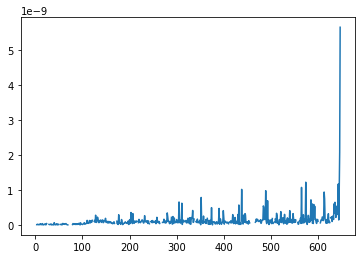

In [14]:
plt.plot(s_total)

# Parameter Estimation

$y(t) = \theta (t)y(t-1) + e(t)$

$\hat{\theta} = argmin_ϕ \sum_{k = 1}^ K |y(t + kT_p) - \phi y (t + kT_p -1)| ^2$

where $t$ = 0,.. $T_p$-1

$T_w$ = 1 month = 28 days

$T_p$ = 1 day

In [15]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


In [16]:
df_h.h = [df_h.Timestamp.iloc[i].hour for i in range(len(df_h))]

In [17]:
#grouping df based on hours
grouped_hours = df_h.groupby(df_h.h)
hours=[grouped_hours.get_group(x) for x in grouped_hours.groups]

In [18]:
len(hours[1])

28

In [19]:
#y = [y(t), y(t+Tp),...] - same hours in different days, Tp= 1 day in this sense, thre will be 24 vectors for y, for every hour
y_tuples = []
for i in range(len(hours)-1,0,-1):
  y_tuples.append(pd.DataFrame({str(i):hours[i]["Memoria Usata"].values, str(i-1):hours[i-1]["Memoria Usata"].values}))

In [20]:
len(y_tuples)

23

In [21]:
for i in y_tuples:
  print(i)

           23         22
0   51.921724  63.542467
1   69.582081  60.504005
2   64.498821  54.875317
3         NaN        NaN
4   62.847241  76.595441
5   60.706000  95.671346
6   70.369142  61.420261
7   80.697321  81.570100
8   61.760442  58.849559
9   59.018333  68.077751
10  56.101284  61.035211
11  96.827895  57.454697
12  51.630444  57.017657
13  49.931558  64.922500
14  58.494021  56.210819
15  65.151588  56.628795
16  57.235940  53.000885
17  56.480420  60.732197
18  55.093011  62.060000
19  49.243947  59.592565
20  62.668385  52.536655
21  62.778278  59.476963
22  76.846273  66.732657
23  67.515522  62.813677
24  49.592707  58.989943
25  37.853973  43.859286
26  64.296444  68.879036
27  68.173853  73.652603
           22         21
0   63.542467  52.874839
1   60.504005  56.672137
2   54.875317  72.147403
3         NaN  65.015484
4   76.595441  85.688875
5   95.671346  69.946017
6   61.420261  57.982842
7   81.570100  58.232875
8   58.849559  62.397638
9   68.077751  63.490220


In [22]:
y_tuples[-1]

,1,0
0,55.682537,66.974122
1,41.267632,NaN
2,NaN,74.137143
3,51.474000,76.474500
4,NaN,NaN
5,90.321667,75.482727
6,117.680000,136.881739
7,56.520769,46.176216
8,NaN,58.485333
9,51.599474,55.990333


In [23]:
#If there is any missing value, drop row from y(t) and y(t-T), in our case T = 1
for i in range(len(y_tuples)):
  y_tuples[i] = y_tuples[i].dropna() 

In [24]:
y_tuples[-1]

,1,0
0,55.682537,66.974122
3,51.474000,76.474500
5,90.321667,75.482727
6,117.680000,136.881739
7,56.520769,46.176216
9,51.599474,55.990333
11,74.242000,51.737500
13,80.503750,63.566897
14,77.090000,59.359687
15,66.045294,47.936930


In [25]:
#theta values are y(t)/y(t-1)

for i in range(len(y_tuples)-1,0,-1):
  y_tuples[i]["theta"] = y_tuples[i][str(len(y_tuples)-i)] / y_tuples[i][str(len(y_tuples)-i-1)] 

In [26]:
y_tuples[22]

,1,0,theta
0,55.682537,66.974122,0.831404
3,51.474000,76.474500,0.673087
5,90.321667,75.482727,1.196587
6,117.680000,136.881739,0.859720
7,56.520769,46.176216,1.224023
9,51.599474,55.990333,0.921578
11,74.242000,51.737500,1.434975
13,80.503750,63.566897,1.266441
14,77.090000,59.359687,1.298693
15,66.045294,47.936930,1.377754


In [27]:
phi = Symbol("phi")


phi_tot = []
for i in range(len(y_tuples)-1,0,-1):
  phi_solution_set = []
  for j in range(len(y_tuples[i])):
    
    a = solve(y_tuples[i].iloc[j].theta - (y_tuples[i][str(len(y_tuples)-i)].iloc[j] + phi * y_tuples[i][str(len(y_tuples)-i-1)].iloc[j])**2)
    phi_solution_set.append(a)
  phi_tot.append(phi_solution_set)

In [28]:
pd.DataFrame(phi_tot)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,"[-0.845018186059131, -0.817789357069783]","[-0.683815113024465, -0.662359101909925]","[-1.21107909399900, -1.18209534285792]","[-0.866494038926602, -0.852946417449578]","[-1.24798283323375, -1.20006396930700]","[-0.938723869451878, -0.904432640334116]","[-1.45812813271687, -1.41182113039016]","[-1.28414500656461, -1.24873781034291]","[-1.31789106950601, -1.27949457205418]","[-1.40223981806467, -1.35326806945996]",...,"[-1.07243265640610, -1.01345186134432]",None,None,None,None,None,None,None,None,None
1,"[-1.25418060931789, -1.21427730642514]","[-1.69115624658147, -1.64545168755399]","[-0.528996739890553, -0.509584060592647]","[-0.664531428819296, -0.643550034405506]","[-1.17616040641126, -1.13205309948603]","[-1.22154429673379, -1.17450805073968]","[-0.586705750918384, -0.565315399704082]","[-0.607308646663412, -0.586913900096392]","[-0.993424525227722, -0.952713769313928]","[-1.04861900481561, -1.01211025367472]",...,None,None,None,None,None,None,None,None,None,None
2,"[-1.06423473100787, -1.02785024609848]","[-1.24328325577514, -1.19448362953028]","[-1.12844894465710, -1.08384227883234]","[-0.532169206898616, -0.507007490290760]","[-1.35885058622865, -1.32123383043400]",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"[-1.21382637741978, -1.17984110570347]","[-1.23085772195376, -1.19769877259951]","[-2.24648944661226, -2.16187001002306]","[-3.28722098071786, -3.16028697262254]","[-1.75100666271595, -1.66353807586895]","[-2.69121421064468, -2.63205160295943]","[-2.05887797535341, -1.96360206392207]","[-0.618828973163235, -0.599899345384611]","[-1.21073313977296, -1.17295315283152]",None,...,None,None,None,None,None,None,None,None,None,None
4,"[-0.801860331760619, -0.777832877119135]","[-1.04781706016132, -1.02141549564290]","[-0.536672676018416, -0.521536514491554]","[-1.20671563098237, -1.16942985571858]","[-0.898048482035154, -0.874717439884984]","[-1.02345932304421, -0.997466121649867]","[-0.808705723513623, -0.789104519004437]","[-1.05994235948685, -1.02505662688498]","[-0.847514226699643, -0.829500782796257]","[-0.972338358405232, -0.938879155671768]",...,None,None,None,None,None,None,None,None,None,None
5,"[-0.951821138118307, -0.918718538789633]","[-0.805052117646358, -0.782699060582502]","[-0.997016357218759, -0.968584288562421]","[-1.07704571340840, -1.04359376155470]","[-1.05573255822786, -1.02835561490424]","[-0.817690577421755, -0.791861072039531]","[-0.781534423083404, -0.759587319289432]","[-0.892089349341295, -0.865877816345403]","[-0.824049768240269, -0.800982544401025]","[-1.23402308680135, -1.19886484013449]",...,"[-0.902264956456322, -0.876945484572882]","[-0.790566224448734, -0.769828576972008]","[-0.803787540604686, -0.780582546433408]","[-0.995603763651164, -0.968345567940610]","[-1.78222990388421, -1.72755222412664]","[-0.891444855988830, -0.867045203844414]",None,None,None,None
6,"[-1.13583182640465, -1.09716083078187]","[-0.874340594011274, -0.845039809851682]","[-0.907085804750619, -0.879504928220435]","[-1.04505881971169, -1.01397155059258]","[-1.00398109638426, -0.978358106576953]","[-1.16339877081108, -1.12512804383723]","[-1.07492683530159, -1.04154897852369]","[-1.01946866941398, -0.987605571587386]","[-1.03178811219818, -1.00004305361781]","[-0.844548729253936, -0.820637305852164]",...,"[-0.843825348178671, -0.821665429586685]","[-0.927381386724144, -0.898548659166756]","[-0.997670262052294, -0.967838750405486]","[-1.06621671326896, -1.03250322025453]","[-0.996450252482330, -0.968683331698820]","[-0.872404318075477, -0.850574016083827]","[-1.01769875673050, -0.988061143504420]",None,None,None
7,"[-1.01168469752230, -0.978981992169629]","[-1.20052342422694, -1.16058332940142]","[-0.926891899538174, -0.895706882750352]","[-0.977458577183512, -0.948256452571594]","[-3.52138155188186, -3.40017511926760]","[-1.11695040580056, -1.09004858263690]","[-0.948917484130765, -0.923791217780439]","[-1.01357426565356, 

In [29]:
calc = []
errors = []
dif = []
alt1 = []
for n in range(len(df_h)):
  if df_h.Timestamp.iloc[n].date() != min(df_h.Timestamp).date(): #Excluding the first day in the data, to avoid index out of range error
    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[n]]["Memoria Usata"].values #s(t) = Current value
    yesterday = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[n]-datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t-24hours) = Value which is tracked in yesterday, at same time 

    if  len(yesterday)>0 and len(current)>0: #if s(t) and s(t-T) are both present, add them to V_t
      calc.append(((abs(current-yesterday)**2)*yesterday)[0])
      dif.append((current-yesterday)[0])
      errors.append((current - calc[-1])[0])
    else: #not valid
      calc.append(0)
      errors.append(0)
      dif.append(0)
  else:
    calc.append(0)
    errors.append(0)
    dif.append(0)

In [30]:
df_h["calc"] = calc
df_h["errors"] = errors
df_h["dif"] = dif

In [31]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,calc,errors,dif
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0,-2.0,0.000000,0.000000,0.000000
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1,-2.0,0.000000,0.000000,0.000000
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2,-2.0,0.000000,0.000000,0.000000
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.000000,0.000000,0.000000
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4,-2.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19,-2.0,1200.669169,-1133.571618,4.375227
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20,-2.0,1895.976425,-1834.605830,-5.331468
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21,-2.0,10702.198498,-10633.099189,13.927673
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22,-2.0,1569.543003,-1495.890400,4.773568


In [32]:
10702**(1/2)

103.45047124107265

In [33]:
sorted(errors)

[-213842.0569996173,
 -135061.00783255426,
 -130331.99512339439,
 -26405.285260299697,
 -25216.12840897722,
 -23432.9440127744,
 -5149.263685027845,
 -4016.321425914736,
 -2608.230198080278,
 -1065.8130304507058,
 -955.0462236630704,
 -861.0756708652306,
 -680.6681514352765,
 -555.764654806843,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 nan,
 -11528.979363892013,
 nan,
 nan,
 -246790.5299063305,
 -170092.76160212077,
 -32690.4110471906,
 -17789.670021471185,
 -16124.191096963243,
 -13738.638853349185,
 -13499.914877370415,
 -12508.762316909584,
 -11662.412220960681,
 -11466.204957162869,
 -9601.843836574528,
 -9566.628547522678,
 -7878.125210594139,
 -5926.577984961566,
 -4594.943795450514,
 -4518.809553801599,
 -4370.13429551572,
 -2465.625579865185,
 -2123.054863901546,
 -1912.557842001828,
 -1862.0208041910548,
 -1674.551618722467,
 -705.7552129360427,
 -526.1359218809965,
 -332.00656731641527,
 nan,
 nan,
 nan,
 nan,
 -1877.7503

In [34]:
for i in calc:
  print(math.sqrt(i))

NameError: ignored